In [1]:
from tqdm.notebook import tqdm
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import statistics
import seaborn as sns

from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [2]:
movie_df = pd.read_csv("(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
movie_df['개봉일'] = pd.to_datetime(movie_df['개봉일'])
movie_df['기준일'] = pd.to_datetime(movie_df['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
movie_df['기준연도'] = movie_df['기준일'].apply(lambda x : x.year)
movie_df['기준월'] = movie_df['기준일'].apply(lambda x : x.month)
movie_df['개봉연도'] = movie_df['개봉일'].apply(lambda x : x.year)
movie_df['개봉월'] = movie_df['개봉일'].apply(lambda x : x.month)

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482752 entries, 0 to 482751
Data columns (total 22 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   순위      482752 non-null  int64         
 1   영화명     482752 non-null  object        
 2   개봉일     482752 non-null  datetime64[ns]
 3   등급      476018 non-null  object        
 4   장르      482752 non-null  object        
 5   대표국적    482714 non-null  object        
 6   국적      482714 non-null  object        
 7   제작사     213248 non-null  object        
 8   배급사     465038 non-null  object        
 9   감독      469607 non-null  object        
 10  배우      447025 non-null  object        
 11  기준일     482752 non-null  datetime64[ns]
 12  매출액     482752 non-null  int64         
 13  누적매출액   482752 non-null  int64         
 14  관객수     482752 non-null  int64         
 15  누적관객수   482752 non-null  int64         
 16  스크린수    482752 non-null  int64         
 17  상영횟수    482752 non-null  int6

In [3]:
# 역대 장르
top_movie = pd.read_csv("누적관객수_백만명_이상_766개.csv")

# 개봉일과 기준일 날짜형식으로 바꾸기
top_movie['개봉일'] = pd.to_datetime(top_movie['개봉일'])
top_movie['기준일'] = pd.to_datetime(top_movie['기준일'])

# 개봉일, 기준일 기준 - 연도, 월 컬럼 각각 추가
top_movie['기준연도'] = top_movie['기준일'].apply(lambda x : x.year)
top_movie['기준월'] = top_movie['기준일'].apply(lambda x : x.month)
top_movie['개봉연도'] = top_movie['개봉일'].apply(lambda x : x.year)
top_movie['개봉월'] = top_movie['개봉일'].apply(lambda x : x.month)

top_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65794 entries, 0 to 65793
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   순위      65794 non-null  int64         
 1   영화명     65794 non-null  object        
 2   개봉일     65794 non-null  datetime64[ns]
 3   등급      65794 non-null  object        
 4   장르      65794 non-null  object        
 5   대표국적    65794 non-null  object        
 6   국적      65794 non-null  object        
 7   제작사     42244 non-null  object        
 8   배급사     65739 non-null  object        
 9   감독      65794 non-null  object        
 10  배우      65732 non-null  object        
 11  기준일     65794 non-null  datetime64[ns]
 12  매출액     65794 non-null  int64         
 13  누적매출액   65794 non-null  int64         
 14  관객수     65794 non-null  int64         
 15  누적관객수   65794 non-null  int64         
 16  스크린수    65794 non-null  int64         
 17  상영횟수    65794 non-null  int64         
 18  기준연도  

In [4]:
genre = "어드벤처"
movie_genre = movie_df[movie_df["장르"].str.contains(genre)]
top_genre = top_movie[top_movie["장르"].str.contains(genre)]

movie_genre

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,...,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,기준연도,기준월,개봉연도,개봉월
17,8,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,291500,291500,34,34,1,4,2003,11,2003,11
24,7,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,40000,331500,3,37,1,2,2003,11,2003,11
42,8,인터스테이트,2003-11-14,12세관람가,"어드벤처,판타지,드라마",미국,"미국,캐나다",NaN,프라임픽쳐스,밥 게일,...,676000,1007500,98,135,1,2,2003,11,2003,11
143,2,마스터 앤드 커맨더: 위대한 정복자,2003-11-28,12세관람가,"전쟁,드라마,액션,어드벤처",미국,미국,NaN,이십세기폭스필름코퍼레이션,피터 위어,...,17490000,17490000,2771,2771,7,36,2003,11,2003,11
160,2,마스터 앤드 커맨더: 위대한 정복자,2003-11-28,12세관람가,"전쟁,드라마,액션,어드벤처",미국,미국,NaN,이십세기폭스필름코퍼레이션,피터 위어,...,26103000,43593000,4222,6993,6,35,2003,11,2003,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482666,73,블랙 팬서: 와칸다 포에버,2022-11-09,12세이상관람가,"액션,어드벤처,드라마",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,라이언 쿠글러,...,102000,22203069405,8,2105641,1,1,2022,12,2022,11
482707,42,극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기,2022-12-01,전체관람가,"액션,어드벤처",일본,일본,NaN,트윈플러스파트너스(주),타자키 류타,...,250000,53611179,50,6471,5,5,2022,12,2022,12
482721,9,몬스터 신부: 101번째 프로포즈,2022-12-28,전체관람가,"애니메이션,코미디,판타지,어드벤처",헝가리,"헝가리,러시아",NaN,와이드 릴리즈(주),NaN,...,59368300,190485000,6308,21038,226,292,2022,12,2022,12
482729,1,아바타: 물의 길,2022-12-14,12세이상관람가,"액션,어드벤처,SF,스릴러",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,제임스 카메론,...,6574092724,90296839202,515281,7313149,2050,7454,2022,12,2022,12


# 연도별 매출액, 관객수, 스크린수, 상영횟수 분석

In [5]:
total_movie_year_info = movie_df.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
genre_movie_year_info = movie_genre.groupby(['기준연도']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
total_movie_year_info

,매출액,관객수,스크린수,상영횟수
기준연도,,,,
2003,8929674500,1387201,2482,13792
2004,439910258906,69114163,211682,1153629
2005,778210156467,123004102,477303,2478397
2006,891315288300,144063421,599392,2943349
2007,961366753038,151279529,810025,3836733
2008,961029569651,147355367,925985,4153853
2009,1082129159250,155235763,996027,4271023
2010,1156027134350,147580941,1020766,4358578
2011,1233119476000,159399837,1116519,4232988


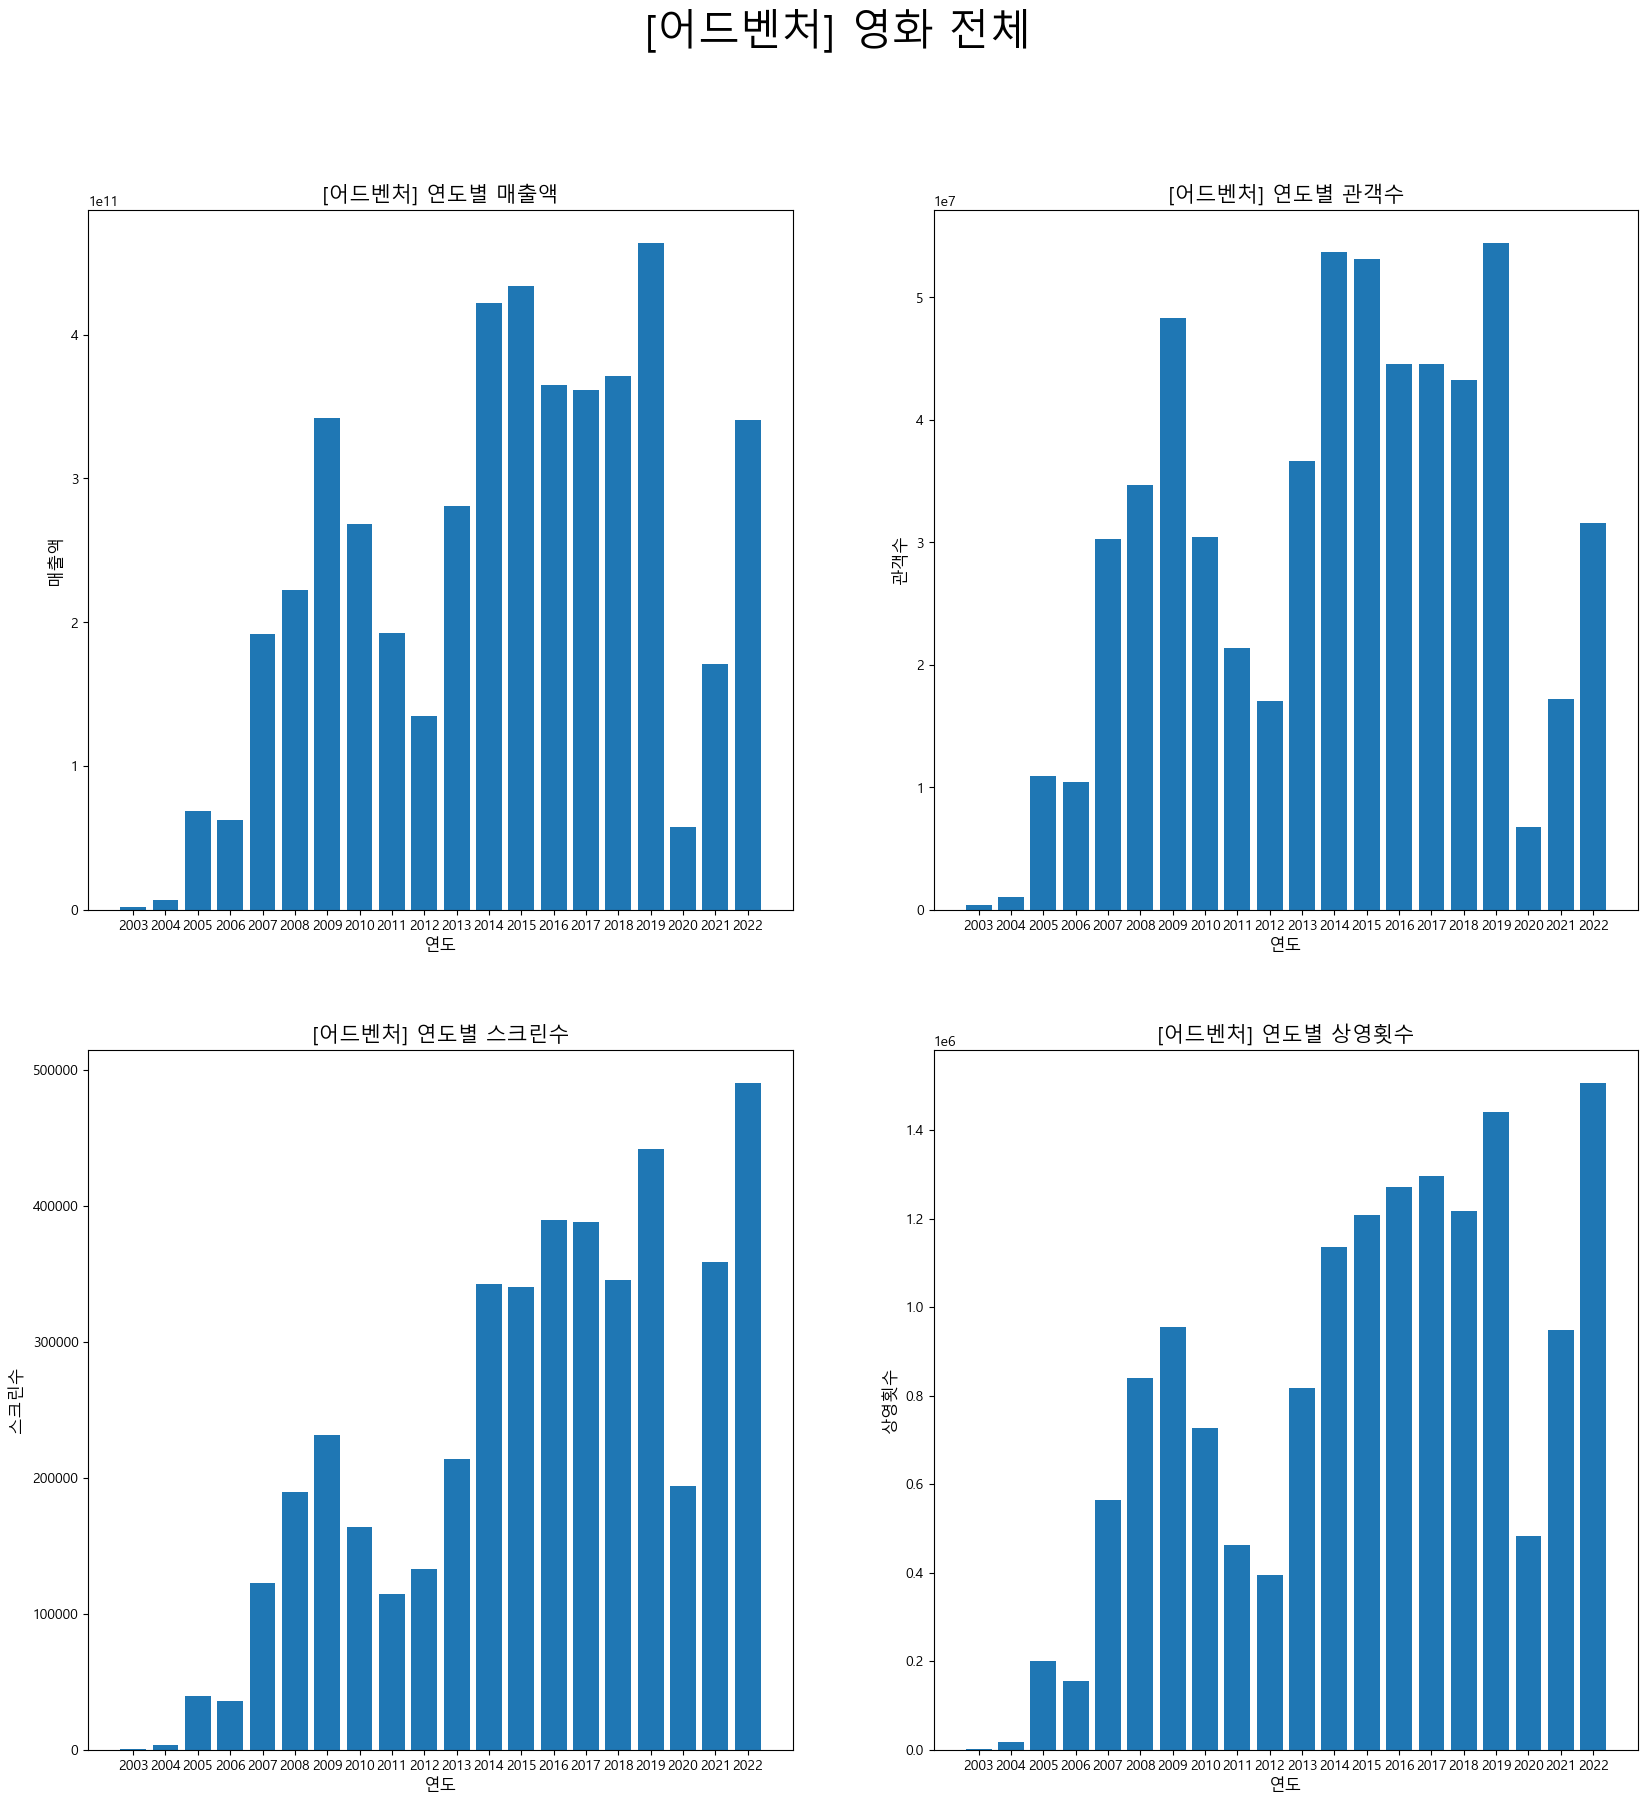

In [6]:
fig = plt.figure(figsize=(20,20))

year_list = list(map(lambda x : str(x),genre_movie_year_info['매출액'].index.to_list()))

ax1 = fig.add_subplot(2,2,1)
ax1.bar(year_list, genre_movie_year_info['매출액'].values)

ax1.set_title(f'[{genre}] 연도별 매출액', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2 = fig.add_subplot(2,2,2)
ax2.bar(year_list, genre_movie_year_info['관객수'].values)

ax2.set_title(f'[{genre}] 연도별 관객수', size=15)
ax2.set_xlabel('연도',size=12)
ax2.set_ylabel('관객수',size=12)

ax3 = fig.add_subplot(2,2,3)
ax3.bar(year_list, genre_movie_year_info['스크린수'].values)

ax3.set_title(f'[{genre}] 연도별 스크린수', size=15)
ax3.set_xlabel('연도',size=12)
ax3.set_ylabel('스크린수',size=12)

ax4 = fig.add_subplot(2,2,4)
ax4.bar(year_list, genre_movie_year_info['상영횟수'].values)

ax4.set_title(f'[{genre}] 연도별 상영횟수', size=15)
ax4.set_xlabel('연도',size=12)
ax4.set_ylabel('상영횟수',size=12)

plt.suptitle(f'[{genre}] 영화 전체', size=30)

plt.show()

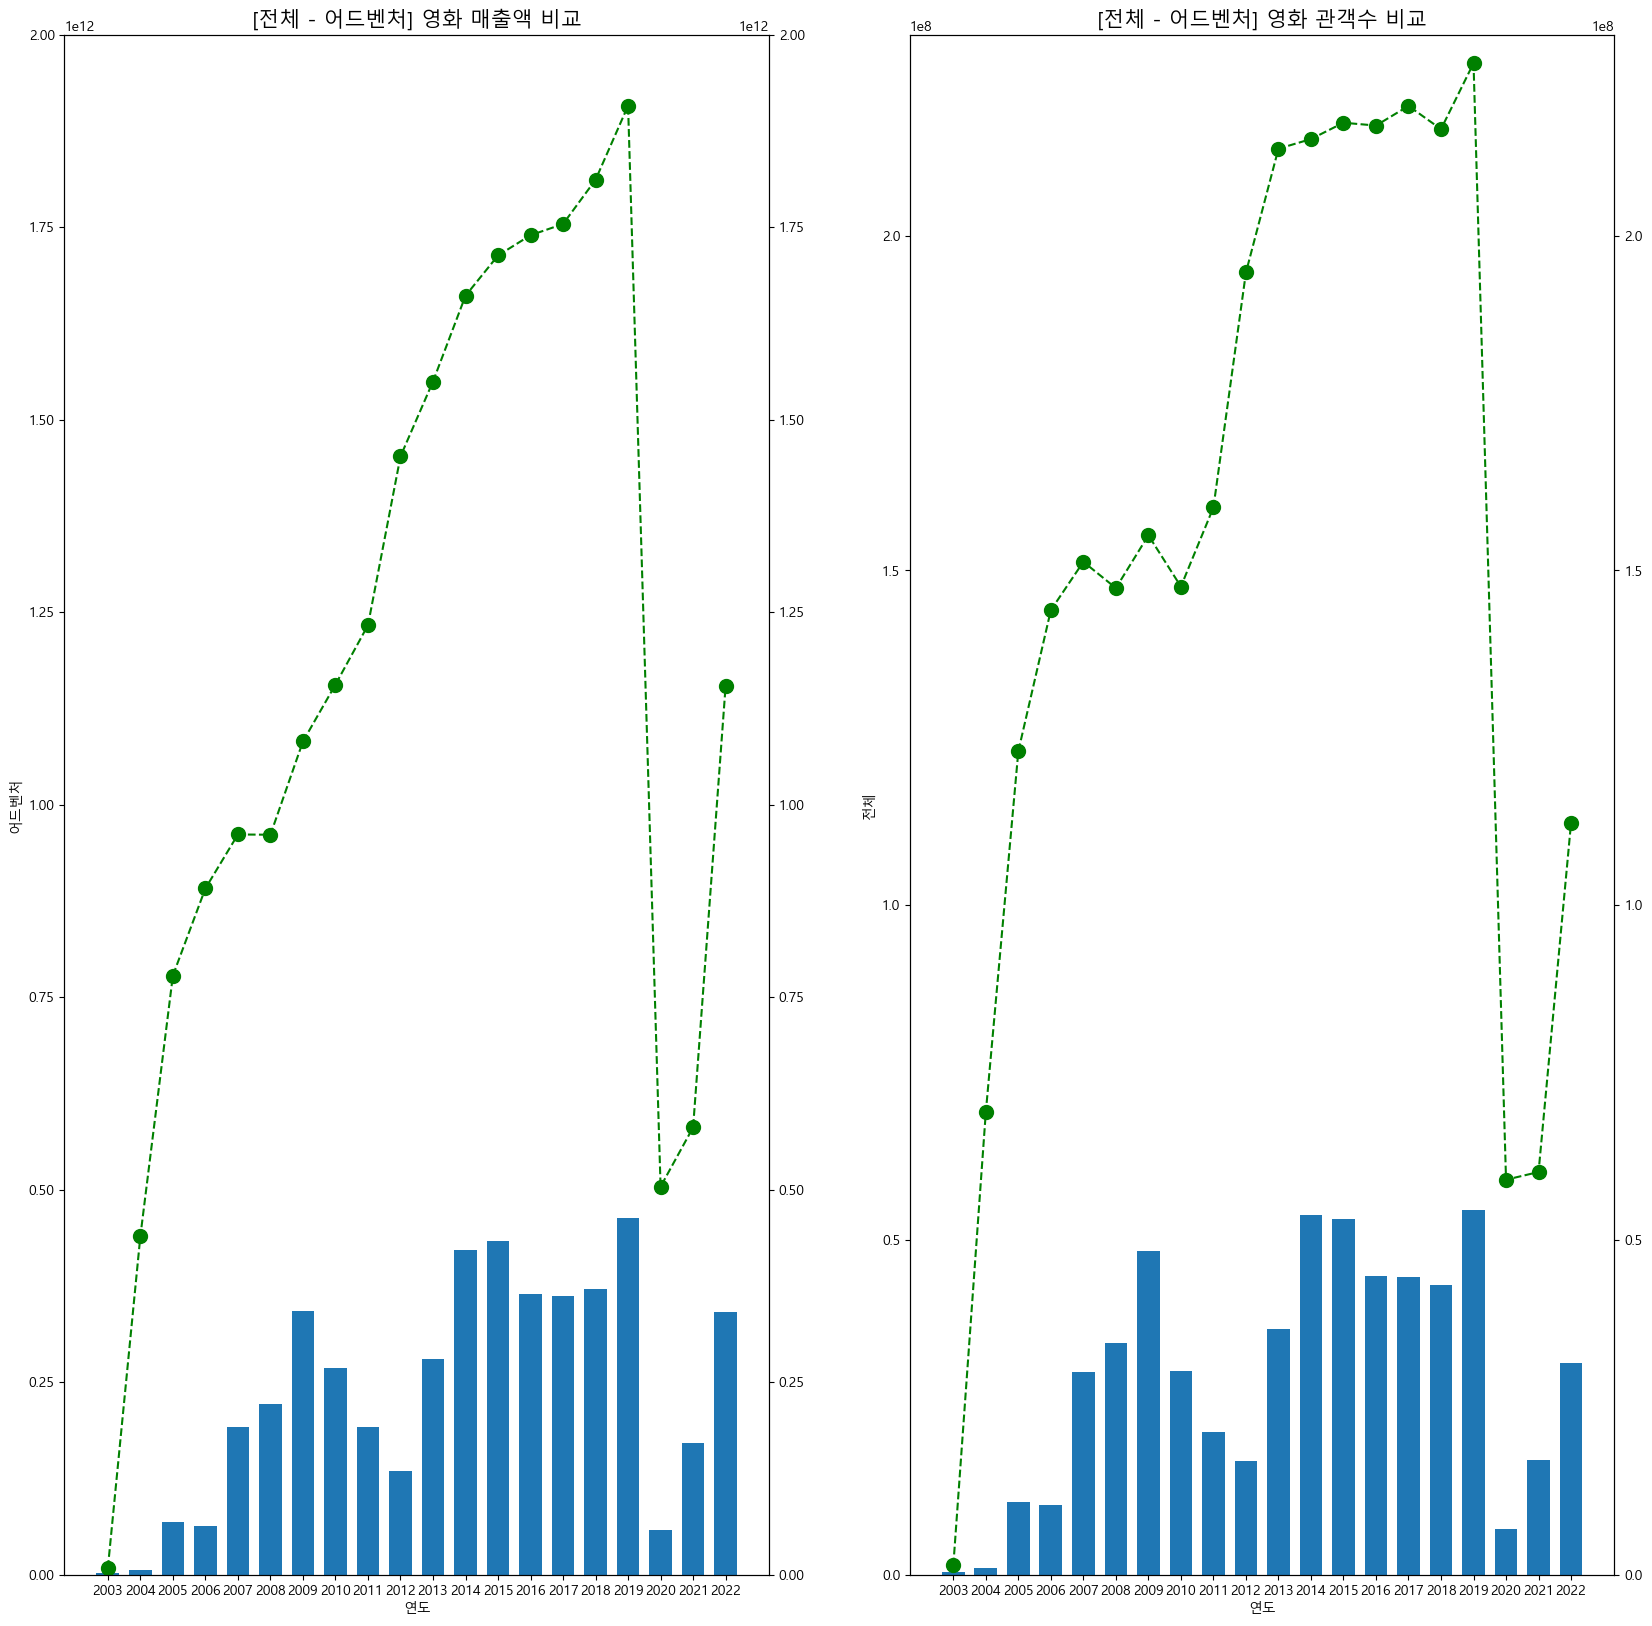

In [7]:
year_list = [str(i) for i in range(2003,2023)]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)

ax1.bar(year_list, genre_movie_year_info['매출액'].values, width=0.7)
ax2 = ax1.twinx() # 여러 개의 그래프를 한 화면에 나타내기
ax2.plot(year_list, total_movie_year_info['매출액'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax1.set_ylim(0, 2000000000000)
ax2.set_ylim(0, 2000000000000)

ax1.set_xlabel('연도')
ax1.set_ylabel(genre)

ax3 = fig.add_subplot(1,2,2)
ax3.bar(year_list, genre_movie_year_info['관객수'].values, width=0.7)
ax4 = ax3.twinx()
ax4.plot(year_list, total_movie_year_info['관객수'].values, ls='--', marker='o', markersize=10,
         color='green', label='누적매출액') 

ax3.set_ylim(0, 230000000)
ax4.set_ylim(0, 230000000)

ax3.set_xlabel('연도')
ax3.set_ylabel('전체')

ax1.set_title(f'[전체 - {genre}] 영화 매출액 비교', size=15)
ax3.set_title(f'[전체 - {genre}] 영화 관객수 비교', size=15)
plt.show()

In [8]:
genre_rate1 = pd.merge(genre_movie_year_info['매출액'], total_movie_year_info['매출액'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate1.columns = ['장르','전체']
genre_rate1['비율'] = round(genre_rate1['장르']/genre_rate1['전체']*100,1)
genre_rate1

genre_rate2 = pd.merge(genre_movie_year_info['관객수'], total_movie_year_info['관객수'],
                      left_on = "기준연도", right_on = '기준연도', how='left')
genre_rate2.columns = ['장르','전체']
genre_rate2['비율'] = round(genre_rate2['장르']/genre_rate2['전체']*100,1)
genre_rate2

,장르,전체,비율
기준연도,,,
2003,350936,1387201,25.3
2004,1051608,69114163,1.5
2005,10909698,123004102,8.9
2006,10469068,144063421,7.3
2007,30280930,151279529,20.0
2008,34661802,147355367,23.5
2009,48344959,155235763,31.1
2010,30404782,147580941,20.6
2011,21351507,159399837,13.4


In [9]:
print("-------매출액--------")
print('장르 합 : ',genre_rate1.sum().장르)
print('전체 합 : ',genre_rate1.sum().전체)
print('평균비율 : ',round(genre_rate1.sum().장르/genre_rate1.sum().전체*100,1))

print("-------관객수--------")
print('장르 합 : ',genre_rate2.sum().장르)
print('전체 합 : ',genre_rate2.sum().전체)
print('평균비율 : ',round(genre_rate2.sum().장르/genre_rate2.sum().전체*100,1))

-------매출액--------
장르 합 :  4758539959487.0
전체 합 :  23340407994802.0
평균비율 :  20.4
-------관객수--------
장르 합 :  590626871.0
전체 합 :  3046031360.0
평균비율 :  19.4


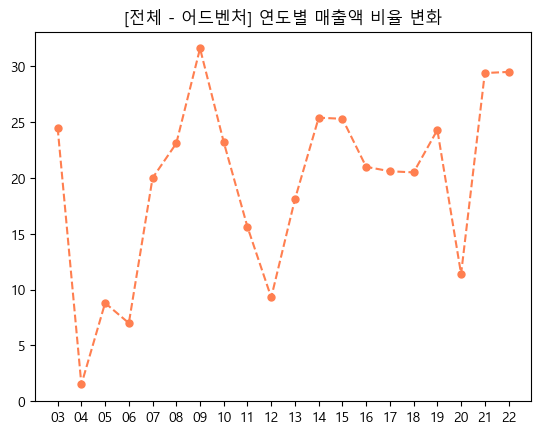

In [10]:
figsize=(20,5)
year_list = [str(i)[2:] for i in range(2003,2023)]
plt.plot(year_list, genre_rate1['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f'[전체 - {genre}] 연도별 매출액 비율 변화')
plt.show()

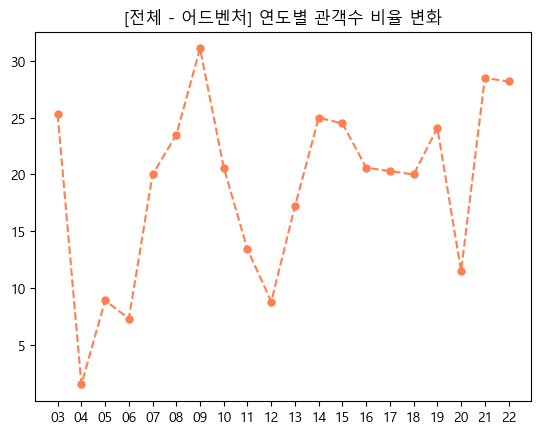

In [11]:
figsize=(20,5)
year_list = [str(i)[2:] for i in range(2003,2023)]
plt.plot(year_list, genre_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f'[전체 - {genre}] 연도별 관객수 비율 변화')
plt.show()

# 연도별로 월별 관객수 비교 분석

In [12]:
movie_year_month_info = movie_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_year_month_info

매출액      관객수   스크린수    상영횟수
기준연도 기준월                                     
2003 11     129906500    20534     32     158
     12    2061500500   330402    434    1951
2004 1     3122114500   506404   1132    4827
     2      353020000    58216    226     774
     3       55113000     9561    105     265
...               ...      ...    ...     ...
2022 8    10134159181  1064923  25752   44203
     9     4230885682   315578   9432   20005
     10    8673662783   780142  18672   65427
     11   22783577483  2163438  42615  135183
     12   91674062343  7456152  50896  162852

[225 rows x 4 columns]

In [13]:
movie_month_info = movie_genre.groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
movie_month_info

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,453864533176,57436598,479010,1498425
2,291096590082,36162313,337946,1091181
3,240364627374,29279052,315963,1061922
4,257841743877,30984085,290623,1044689
5,535046850575,65149231,444351,1674722
6,610107184157,75151065,488136,1863854
7,837111650834,105904431,629153,2437859
8,421975567049,56400564,411211,1207248
9,120325602448,15271018,209679,609743


In [14]:
movie_year_month_info.loc[2004]

,매출액,관객수,스크린수,상영횟수
기준월,,,,
1,3122114500,506404,1132,4827
2,353020000,58216,226,774
3,55113000,9561,105,265
8,0,0,2,2
9,2492645000,393343,1356,7284
10,523340000,84043,824,3616
11,256000,41,6,15
12,0,0,2,2


In [15]:
top_movie_year_month_info = top_genre.groupby(['기준연도','기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})
top_movie_month_info = top_genre.groupby(['기준월']).agg({'매출액':'sum', '관객수':'sum', '스크린수':'sum', '상영횟수':'sum'})

In [16]:
# 색상 맵 선택
cmap = cm.get_cmap('tab20c')
colors = cmap(np.array(range(1,50)))

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3112\1826526935.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


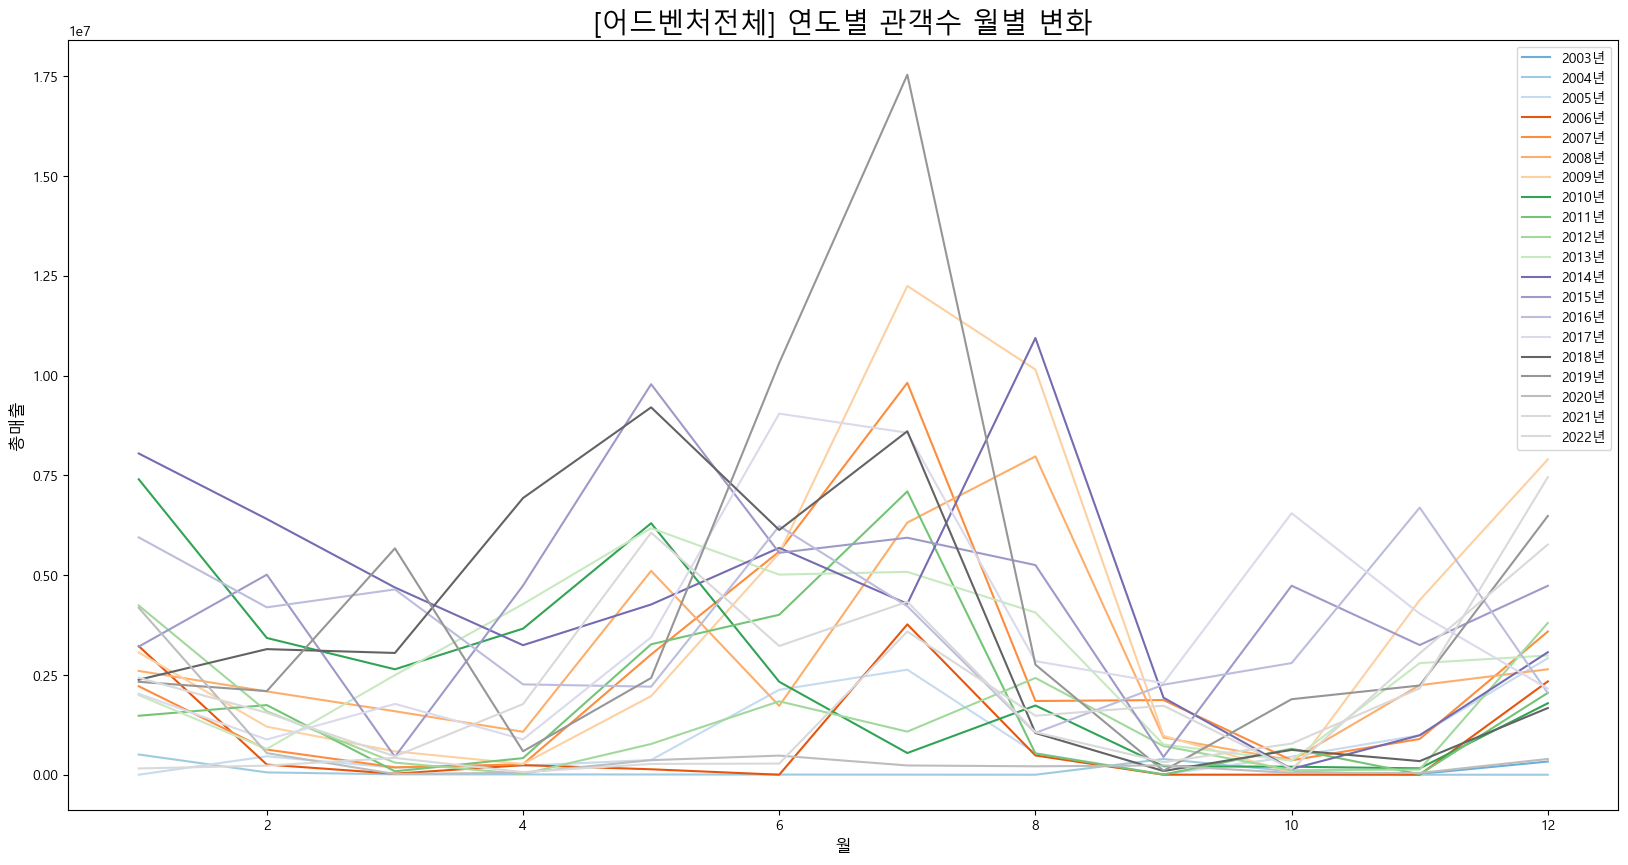

In [17]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = movie_year_month_info.reset_index()['기준연도'].drop_duplicates().reset_index()['기준연도']

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(movie_year_month_info.loc[year]['관객수'].index,movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")

ax.legend(loc="best")
ax.set_title(f'[{genre}전체] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

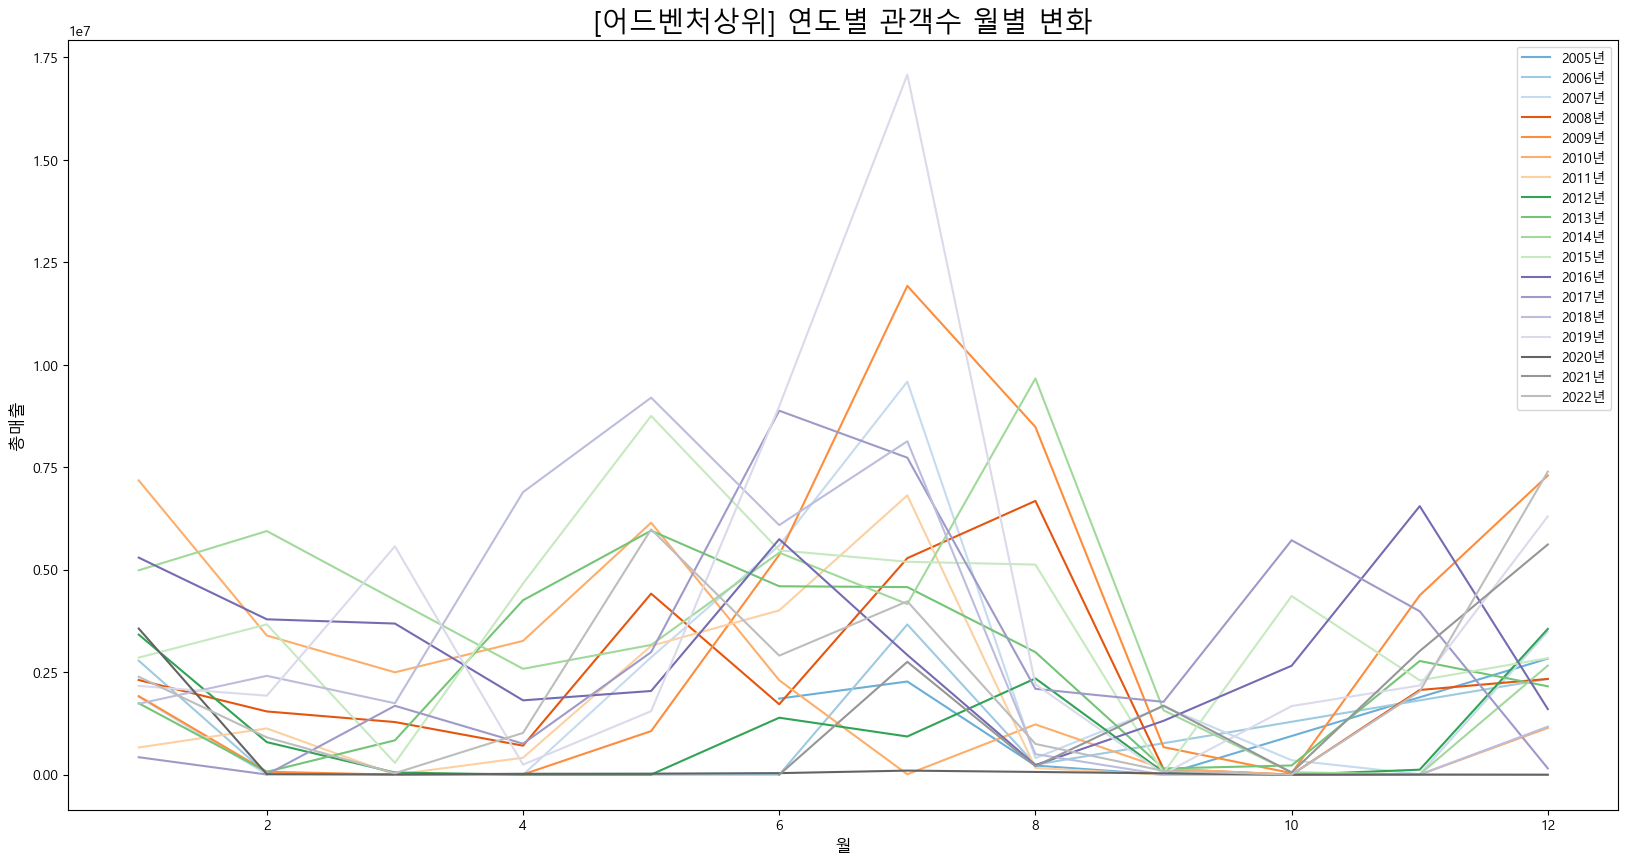

In [18]:
# 연도별 월별 관객수 시각화
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

year_list = top_movie_year_month_info.reset_index()['기준연도'].drop_duplicates().reset_index()['기준연도']

for i in range(len(year_list)):
    year = year_list[i]
    ax.plot(top_movie_year_month_info.loc[year]['관객수'].index,top_movie_year_month_info.loc[year]['관객수'], color=colors[i], label=f"{year}년")
    
ax.legend(loc="best")
ax.set_title(f'[{genre}상위] 연도별 관객수 월별 변화', size=20)
ax.set_xlabel('월',size=12)
ax.set_ylabel('총매출',size=12)
plt.show()

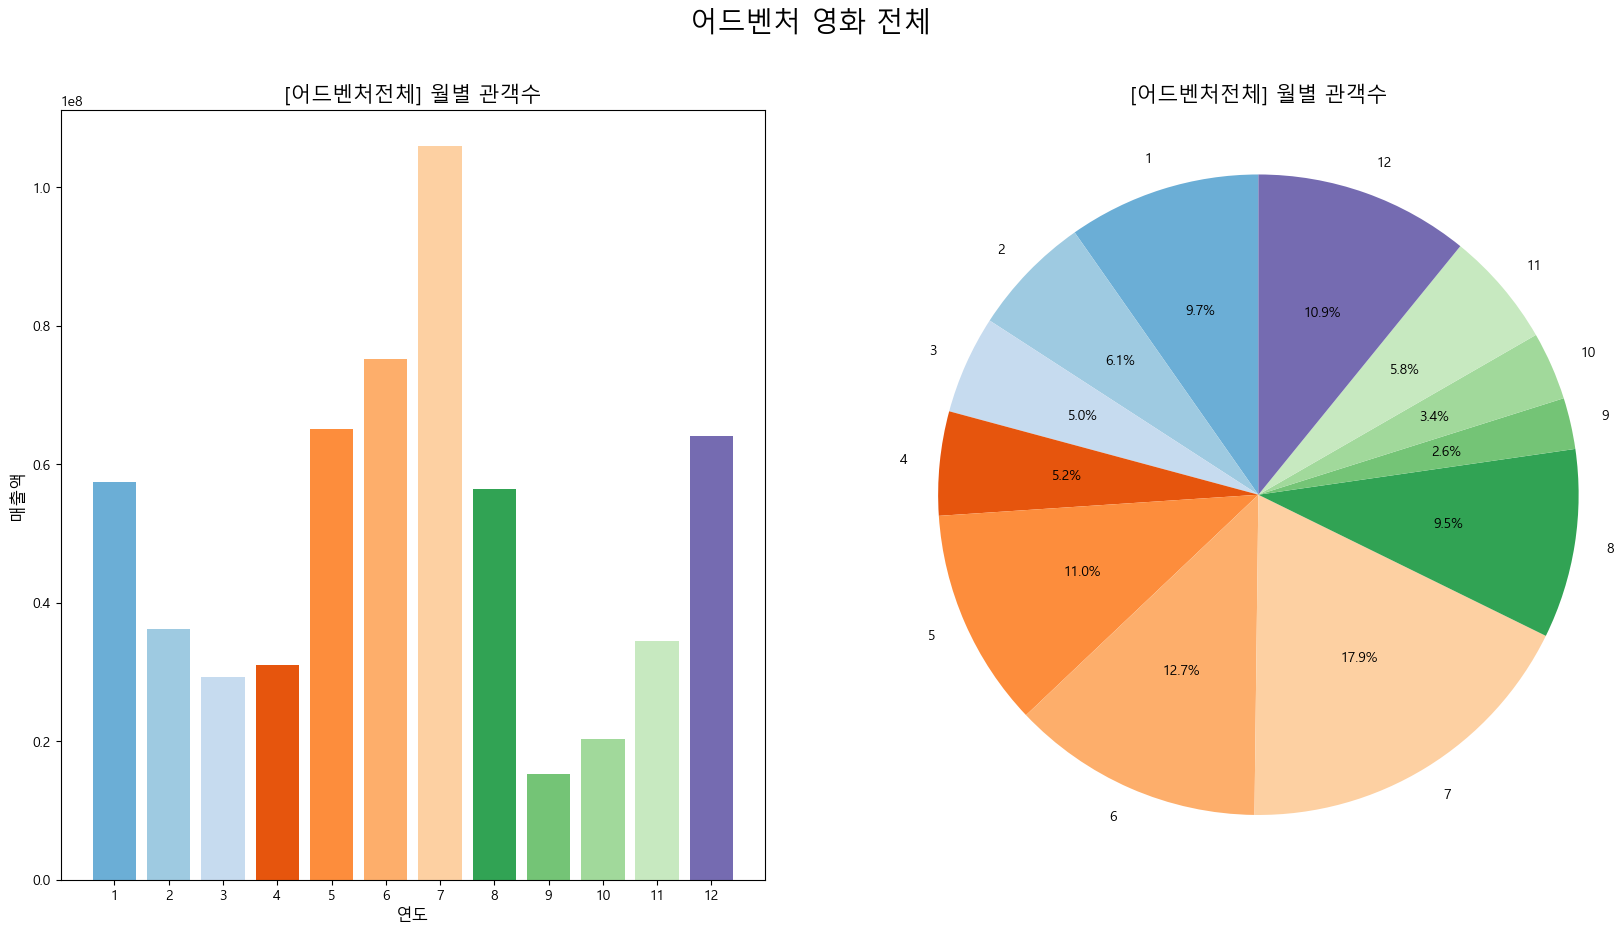

In [19]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, movie_month_info['관객수'].values, color=colors)

ax1.set_title(f'[{genre}전체] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}전체] 월별 관객수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

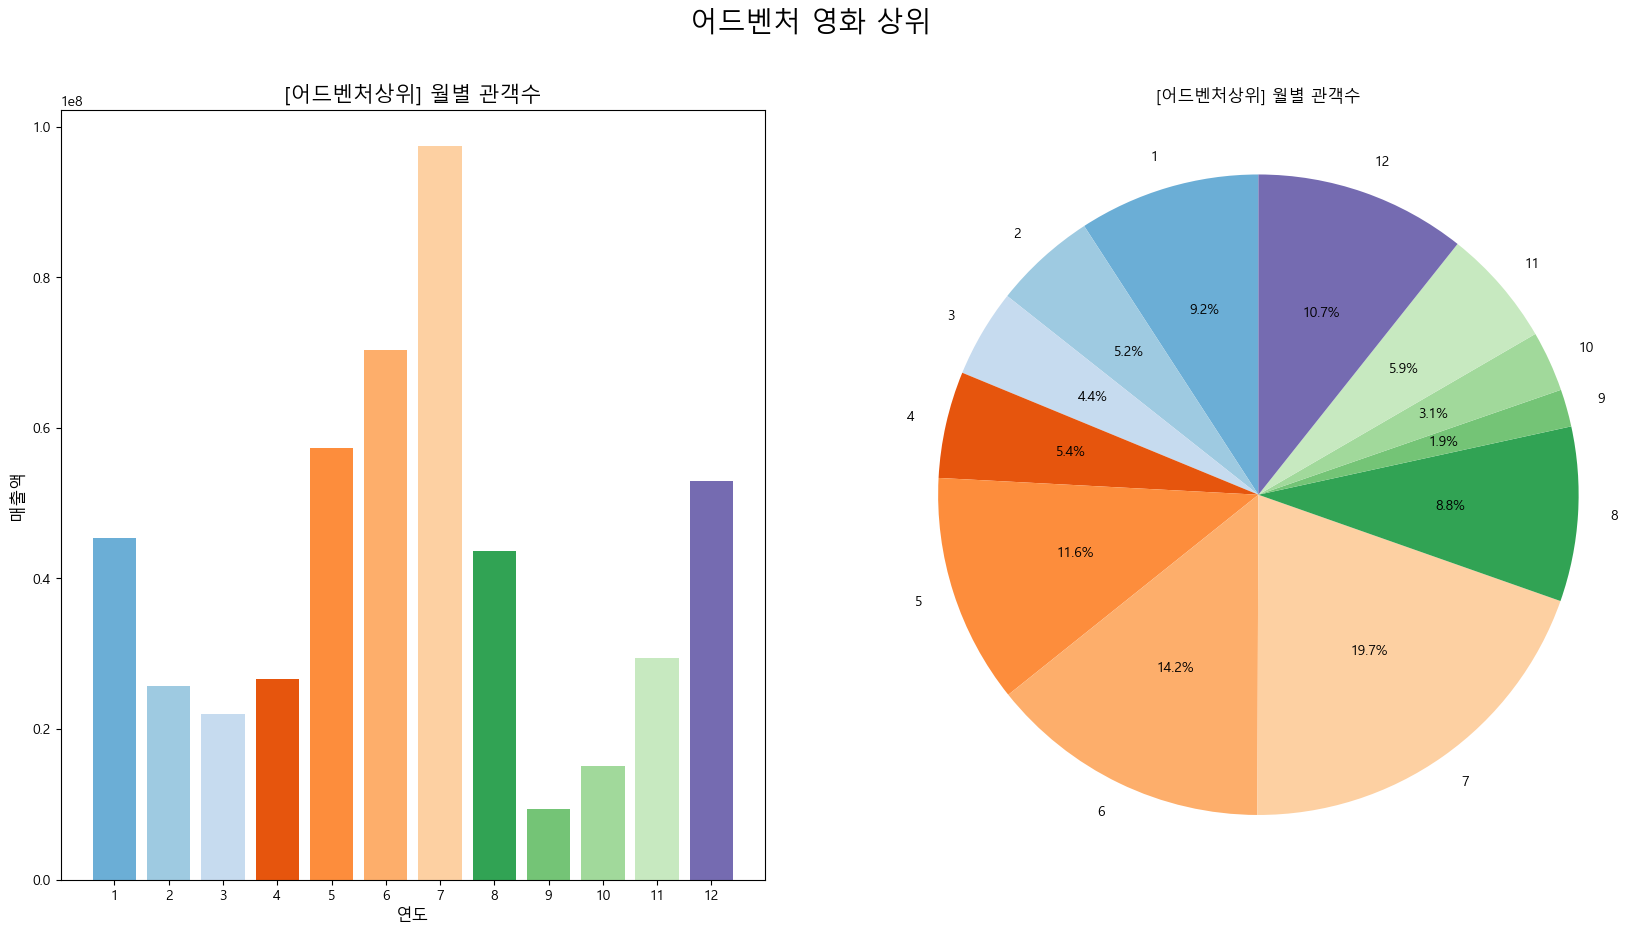

In [20]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.bar(month_list, top_movie_month_info['관객수'].values, color=colors)

ax1.set_title(f'[{genre}상위] 월별 관객수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('매출액',size=12)

ax2.pie(top_movie_month_info['관객수'].values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}상위] 월별 관객수')
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

# 연도별 개봉한 영화수

In [21]:
open_count = movie_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count.drop_duplicates(inplace=True)

print(len(open_count))

960


In [22]:
open_count_df1_1 = open_count.groupby(['개봉연도'])['영화명'].count()
open_count_df1_2 = open_count_df1_1[open_count_df1_1.index>2003]
open_count_df1_2['2003년이전'] = open_count_df1_1[open_count_df1_1.index<=2003].sum(axis=0)
open_count_df1 = open_count_df1_2.copy()
open_count_df1

개봉연도
2004        2
2005       15
2006       13
2007       25
2008       44
2009       41
2010       30
2011       19
2012       28
2013       54
2014       87
2015       73
2016       75
2017       88
2018       82
2019       69
2020       33
2021       48
2022       39
2003년이전    95
Name: 영화명, dtype: int64

In [23]:
open_count_df2 = open_count.groupby(['개봉월'])['영화명'].count()
open_count_df2

개봉월
1      86
2      85
3      58
4      64
5      80
6      75
7     105
8      82
9      75
10     69
11     68
12    113
Name: 영화명, dtype: int64

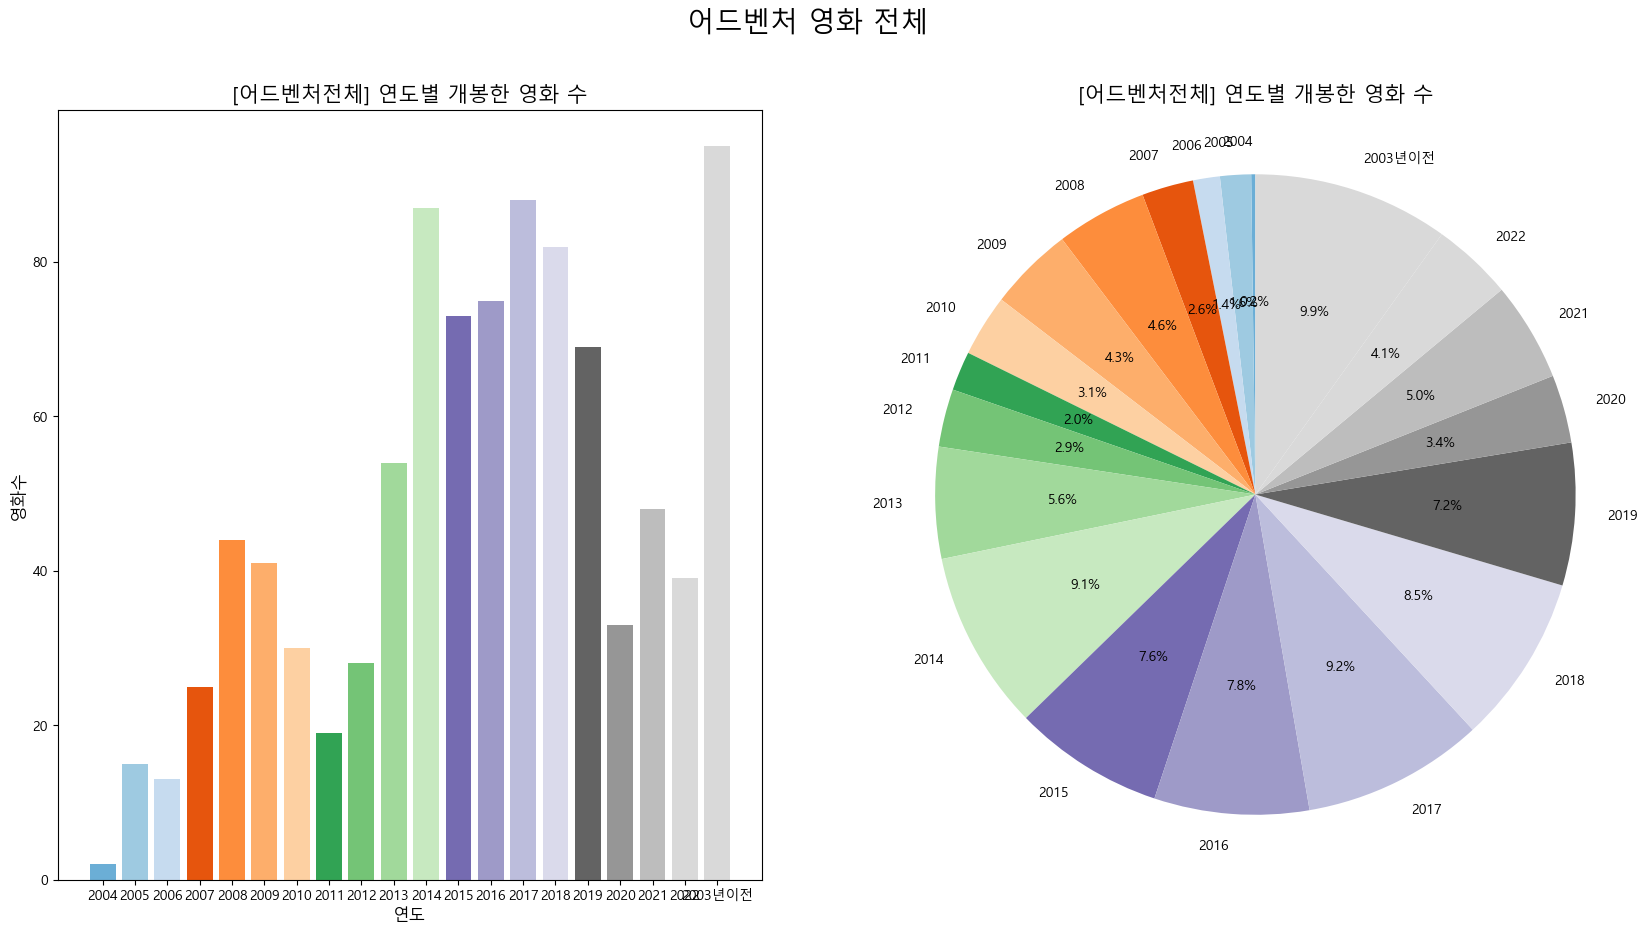

In [24]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in open_count_df1_2.index]

ax1.bar(year_list, open_count_df1.values, color=colors)

ax1.set_title(f'[{genre}전체] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}전체] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

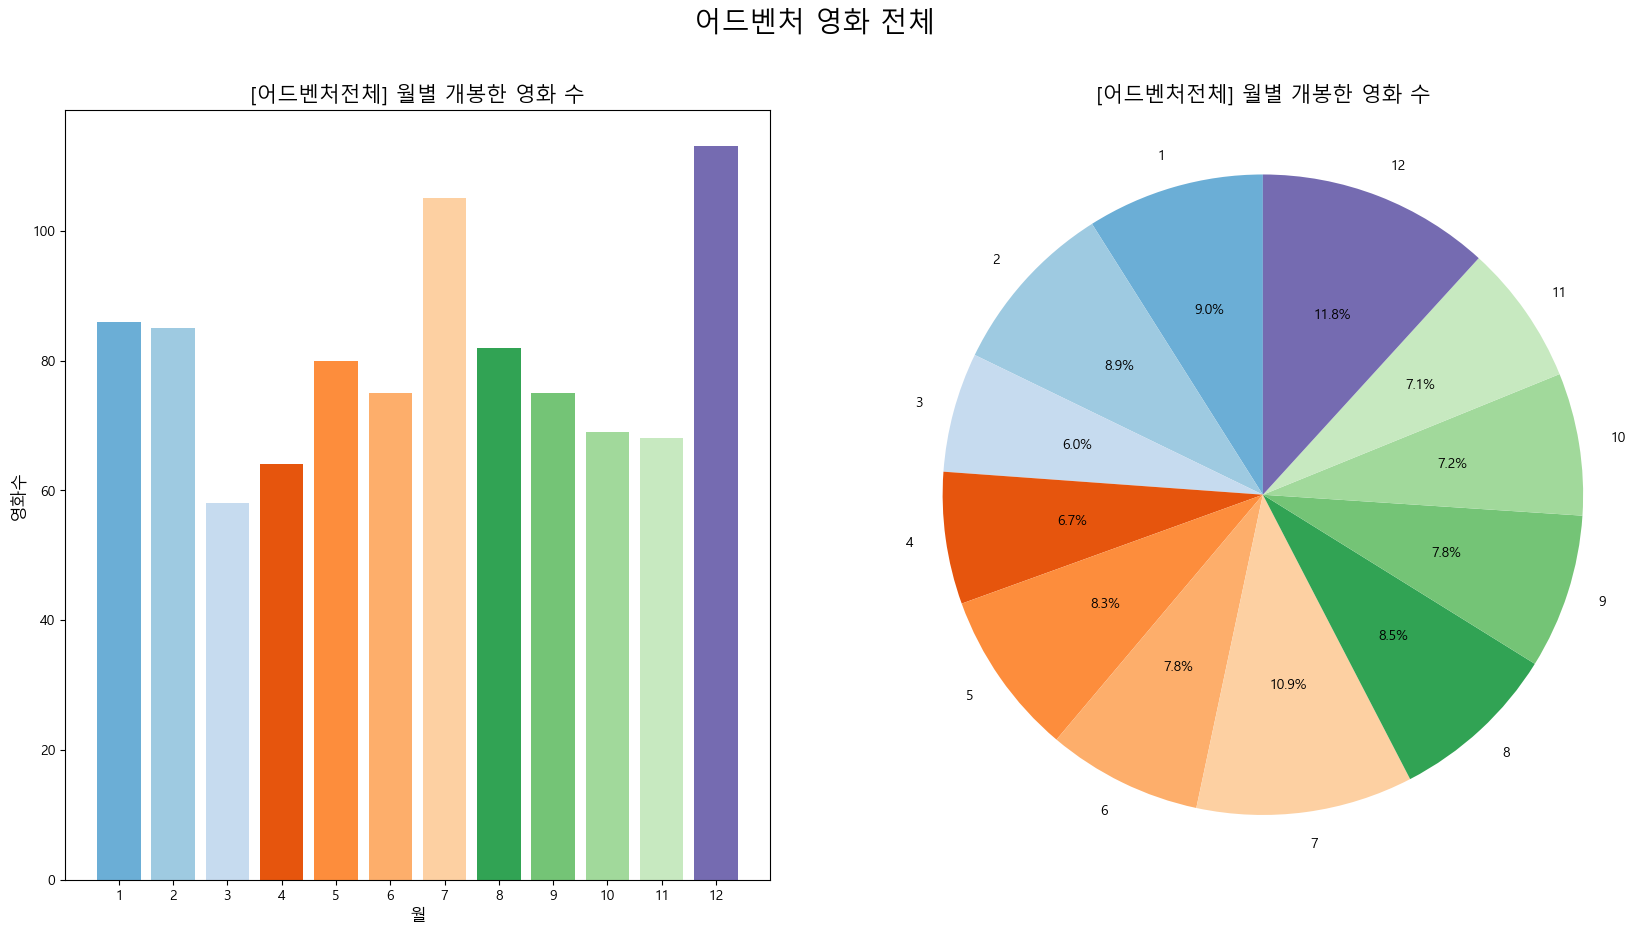

In [25]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, open_count_df2.values, color=colors)

ax1.set_title(f'[{genre}전체] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}전체] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 전체',size=20)

plt.show()

In [26]:
top_open_count = top_genre[['영화명','개봉일','개봉연도','개봉월']].copy()
top_open_count.drop_duplicates(inplace=True)

print(len(top_open_count))

146


In [27]:
top_open_count_df1_1 = top_open_count.groupby(['개봉연도'])['영화명'].count()
top_open_count_df1_2 = top_open_count_df1_1[top_open_count_df1_1.index>2003]
top_open_count_df1_2['2003년이전'] = top_open_count_df1_1[top_open_count_df1_1.index<=2003].sum(axis=0)
top_open_count_df1 = top_open_count_df1_2.copy()
top_open_count_df1

개봉연도
2005        4
2006        2
2007        7
2008       12
2009       11
2010        8
2011        4
2012        8
2013        9
2014       12
2015       10
2016       14
2017       11
2018       10
2019       11
2020        1
2021        4
2022        8
2003년이전     0
Name: 영화명, dtype: int64

In [28]:
top_open_count_df2 = top_open_count[top_open_count["개봉연도"]>2003].groupby(['개봉월'])['영화명'].count()
top_open_count_df2

개봉월
1     16
2      7
3     10
4      9
5     17
6     18
7     25
8      6
9      4
10     6
11     8
12    20
Name: 영화명, dtype: int64

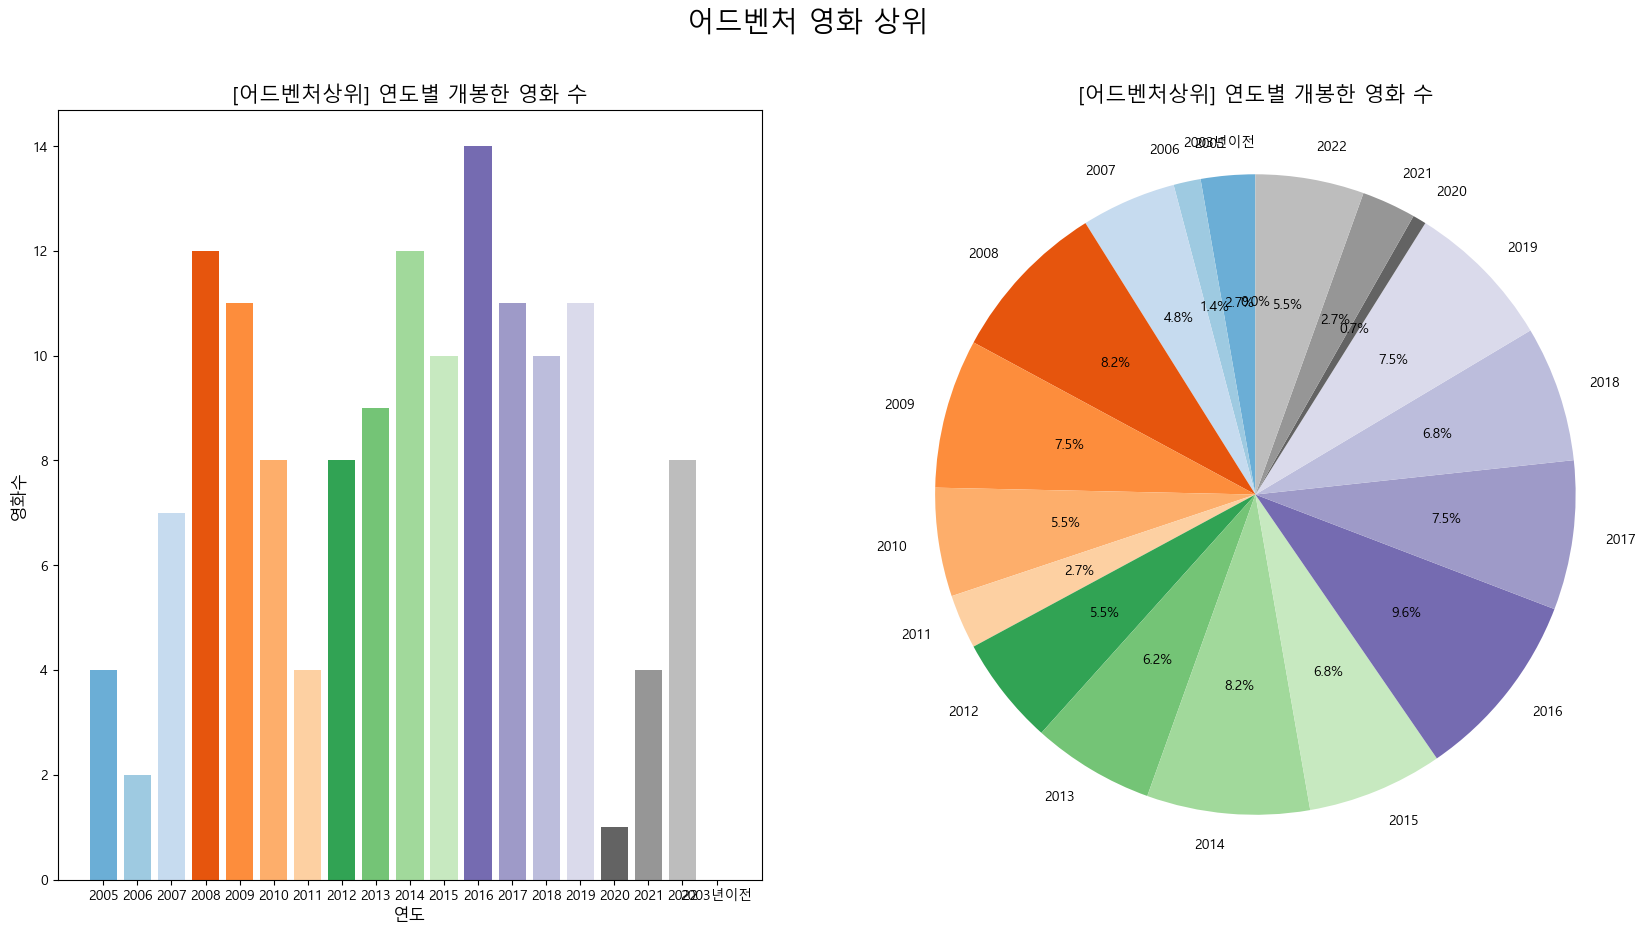

In [29]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

year_list = [str(i) for i in top_open_count_df1.index]
month_list = [str(i) for i in range(1,13)]

ax1.bar(year_list, top_open_count_df1.values, color=colors)

ax1.set_title(f'[{genre}상위] 연도별 개봉한 영화 수', size=15)
ax1.set_xlabel('연도',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df1.values.flatten(), labels=year_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}상위] 연도별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

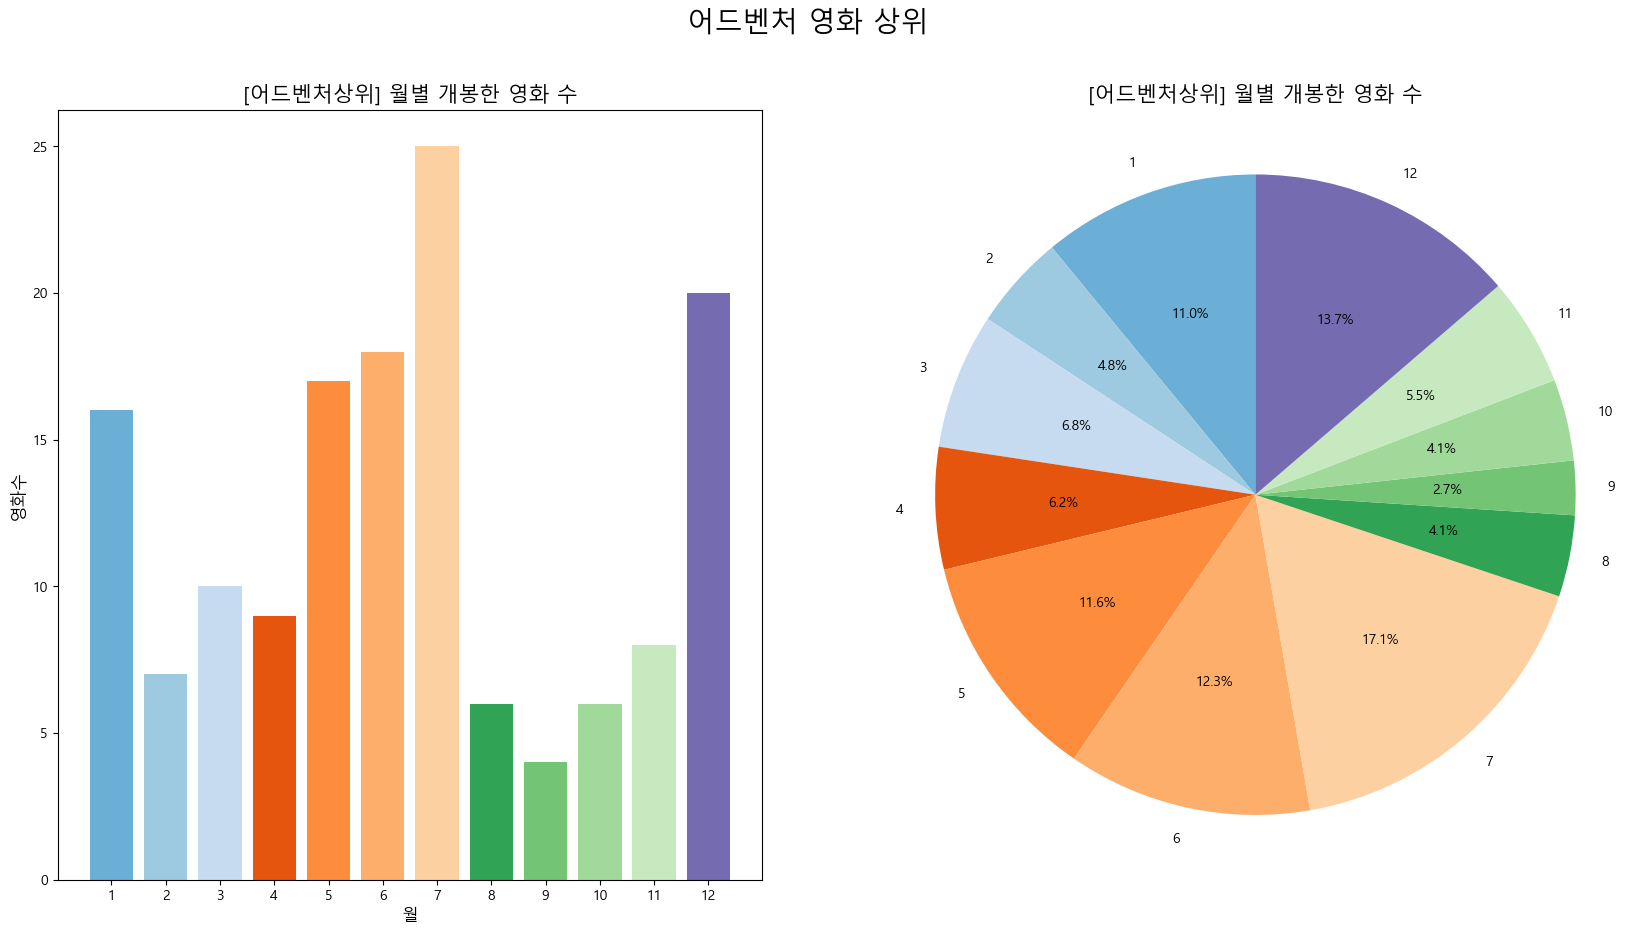

In [30]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

month_list = [str(i) for i in range(1,13)]

ax1.bar(month_list, top_open_count_df2.values, color=colors)

ax1.set_title(f'[{genre}상위] 월별 개봉한 영화 수', size=15)
ax1.set_xlabel('월',size=12)
ax1.set_ylabel('영화수',size=12)

ax2.pie(top_open_count_df2.values.flatten(), labels=month_list, autopct='%1.1f%%', 
                        startangle=90, colors=colors)
ax2.set_title(f'[{genre}상위] 월별 개봉한 영화 수', size=15)
ax2.axis('equal')

plt.suptitle(f'{genre} 영화 상위',size=20)

plt.show()

In [31]:
top_open_count_df1
top_open_count_df2

개봉월
1     16
2      7
3     10
4      9
5     17
6     18
7     25
8      6
9      4
10     6
11     8
12    20
Name: 영화명, dtype: int64

In [32]:
top_open_count_df1

개봉연도
2005        4
2006        2
2007        7
2008       12
2009       11
2010        8
2011        4
2012        8
2013        9
2014       12
2015       10
2016       14
2017       11
2018       10
2019       11
2020        1
2021        4
2022        8
2003년이전     0
Name: 영화명, dtype: int64

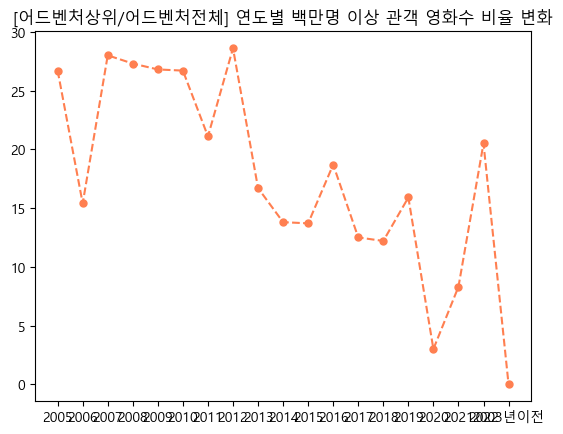

In [33]:
open_count_rate1 = pd.merge(open_count_df1, top_open_count_df1,
                            left_on = '개봉연도', right_on = '개봉연도', how = 'left')

open_count_rate1.columns = ['전체','장르']
open_count_rate1['비율'] = round(open_count_rate1['장르']/open_count_rate1['전체']*100,1)

figsize=(20,5)
year_list = [str(i) for i in open_count_df1.index]
plt.plot(year_list, open_count_rate1['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f"[{genre}상위/{genre}전체] 연도별 백만명 이상 관객 영화수 비율 변화")
plt.show()

In [34]:
open_count_rate1.sort_values(['비율'],ascending=False)[:10]

,전체,장르,비율
개봉연도,,,
2012,28,8.0,28.6
2007,25,7.0,28.0
2008,44,12.0,27.3
2009,41,11.0,26.8
2005,15,4.0,26.7
2010,30,8.0,26.7
2011,19,4.0,21.1
2022,39,8.0,20.5
2016,75,14.0,18.7


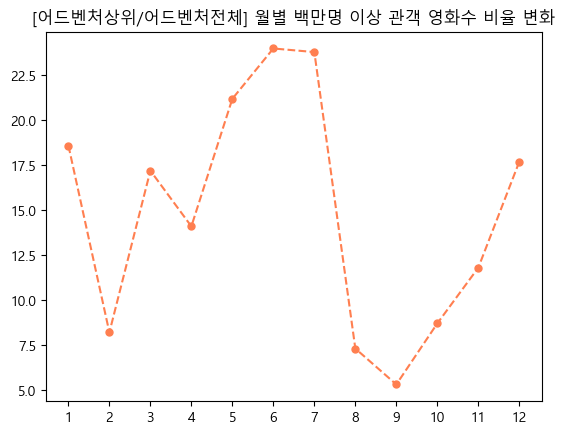

In [35]:
open_count_rate2 = pd.merge(open_count_df2, top_open_count_df2,
                            left_on = '개봉월', right_on = '개봉월', how = 'left')

open_count_rate2.columns = ['전체','장르']
open_count_rate2['비율'] = round(open_count_rate2['장르']/open_count_rate2['전체']*100,1)

figsize=(20,5)
month_list = [str(i) for i in range(1,13)]
plt.plot(month_list, open_count_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f"[{genre}상위/{genre}전체] 월별 백만명 이상 관객 영화수 비율 변화")
plt.show()

In [36]:
open_count_rate2.sort_values(['비율'],ascending=False)['비율'].agg(['min', 'max', 'mean'])

min      5.300
max     24.000
mean    14.825
Name: 비율, dtype: float64

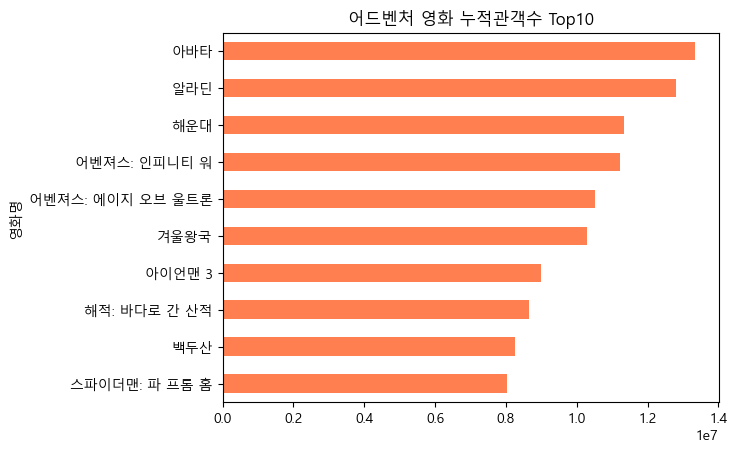

In [37]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10].sort_values(['누적관객수'])[:10].reset_index().set_index('영화명')["누적관객수"].plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()

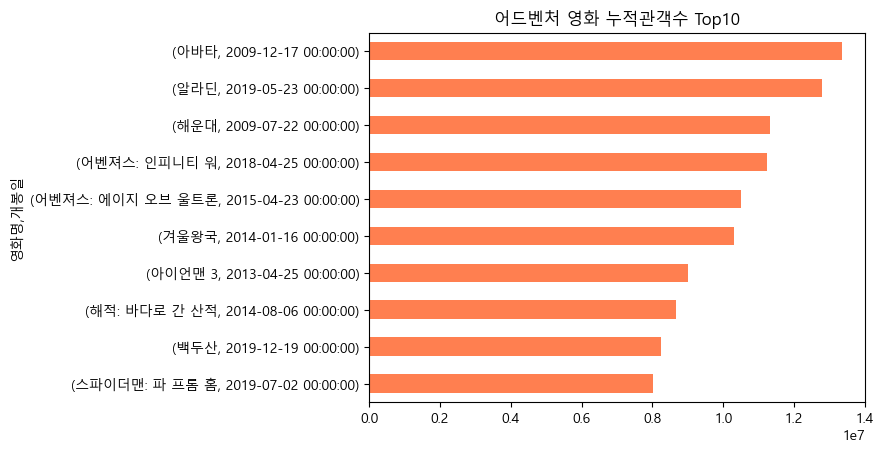

In [38]:
movie_genre.groupby(["영화명","개봉일"])['누적관객수'].max().to_frame().sort_values(['누적관객수'],ascending=False)[:10]["누적관객수"].sort_values().plot(kind='barh', color='coral')
plt.title(f'{genre} 영화 누적관객수 Top10')
plt.show()

### 장르 포함 전체영화

In [39]:
open_count_total = movie_df[['영화명','개봉일','개봉연도','개봉월']].copy()
open_count_total.drop_duplicates(inplace=True)

print(len(open_count_total))

18149


In [40]:
open_count_total_df1_1 = open_count_total.groupby(['개봉연도'])['영화명'].count()
open_count_total_df1_2 = open_count_total_df1_1[open_count_total_df1_1.index>2003]
open_count_total_df1_2['2003년이전'] = open_count_total_df1_1[open_count_total_df1_1.index<=2003].sum(axis=0)
open_count_total_df1 = open_count_total_df1_2.copy()
open_count_total_df1

개봉연도
2004        256
2005        295
2006        350
2007        536
2008        780
2009        415
2010        541
2011        480
2012        561
2013        816
2014        971
2015       1010
2016       1290
2017       1497
2018       1571
2019       1560
2020       1474
2021       1576
2022        646
2023         40
2003년이전    1484
Name: 영화명, dtype: int64

In [41]:
open_count_total_df2 = open_count_total.groupby(['개봉월'])['영화명'].count()
open_count_total_df2

개봉월
1     1373
2     1298
3     1498
4     1518
5     1441
6     1417
7     1516
8     1520
9     1583
10    1549
11    1748
12    1688
Name: 영화명, dtype: int64

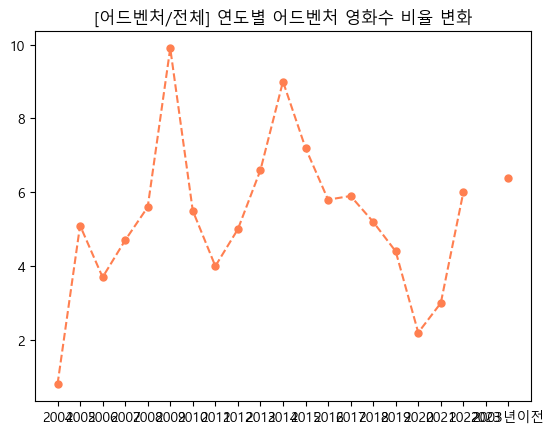

In [42]:
open_count_total_rate1 = pd.merge(open_count_total_df1, open_count_df1,
                            left_on = '개봉연도', right_on = '개봉연도', how = 'left')
open_count_total_rate1.columns = ['전체','장르']
open_count_total_rate1['비율'] = round(open_count_total_rate1['장르']/open_count_total_rate1['전체']*100,1)

figsize=(20,5)
year_list = [str(i) for i in open_count_total_df1.index]
plt.plot(year_list, open_count_total_rate1['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f"[{genre}/전체] 연도별 {genre} 영화수 비율 변화")
plt.show()

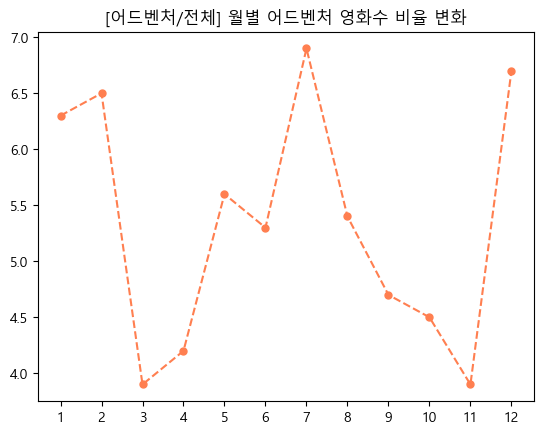

In [43]:
open_count_total_rate2 = pd.merge(open_count_total_df2, open_count_df2,
                            left_on = '개봉월', right_on = '개봉월', how = 'left')
open_count_total_rate2.columns = ['전체','장르']
open_count_total_rate2['비율'] = round(open_count_total_rate2['장르']/open_count_total_rate2['전체']*100,1)

figsize=(20,5)
month_list = [str(i) for i in range(1,13)]
plt.plot(month_list, open_count_total_rate2['비율'].values, ls='--', marker='o', markersize=5, color='coral')
plt.title(f"[{genre}/전체] 월별 {genre} 영화수 비율 변화")
plt.show()